In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

In [3]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [5]:
#load data files
mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(mask_files[0:5])
print(mask_files[-5:])
nomask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(nomask_files[0:5])
print(nomask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']
['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [6]:
print(f'Number of with mask images:{len(mask_files)}')
print(f'Number of without mask images:{len(nomask_files)}')

Number of with mask images:3725
Number of without mask images:3828


In [7]:
mask_files = [1]*3725
nomask_files = [0]*3828
print(mask_files[0:5]),print(nomask_files[0:5])
print(len(mask_files)),print(len(nomask_files))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


(None, None)

In [8]:
labels = mask_files + nomask_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


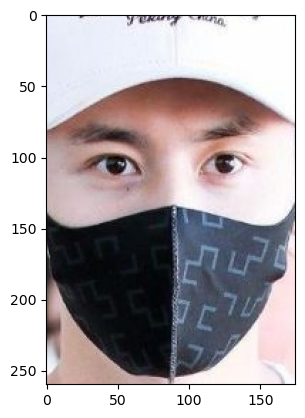

In [9]:
# display with mask image
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_945.jpg')
imgplot = plt.imshow(img)
plt.show()

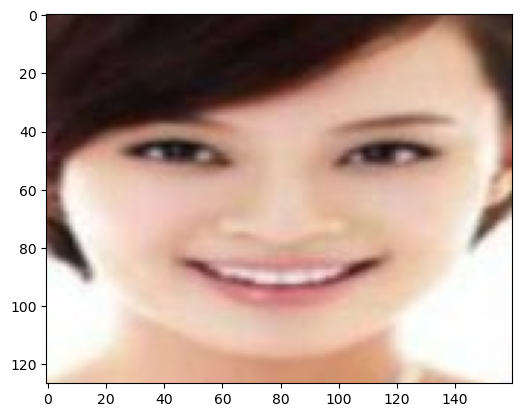

In [10]:
# displaying without mask image
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3215.jpg')
imgplot = plt.imshow(img)
plt.show()

In [11]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'
mask_files = os.listdir(with_mask_path)

data = []

for img_file in mask_files:

  image = Image.open(with_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'
nomask_files = os.listdir(without_mask_path)

for img_file in nomask_files:

  image = Image.open(without_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [14]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [16]:
# scaling the data

x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(array([[[ 28,  27,  23],
         [ 28,  27,  23],
         [ 28,  27,  23],
         ...,
         [ 43,  43,  35],
         [ 43,  43,  35],
         [ 43,  43,  35]],
 
        [[ 30,  29,  25],
         [ 30,  29,  25],
         [ 30,  29,  25],
         ...,
         [ 43,  43,  35],
         [ 43,  43,  35],
         [ 43,  43,  35]],
 
        [[ 29,  28,  24],
         [ 29,  28,  24],
         [ 29,  28,  24],
         ...,
         [ 44,  44,  36],
         [ 44,  44,  36],
         [ 44,  44,  36]],
 
        ...,
 
        [[ 73,  41,  14],
         [ 70,  40,  15],
         [ 61,  35,  16],
         ...,
         [194, 189, 185],
         [193, 188, 184],
         [192, 187, 183]],
 
        [[ 79,  51,  27],
         [ 72,  44,  21],
         [ 61,  35,  17],
         ...,
         [193, 189, 185],
         [192, 188, 184],
         [192, 187, 183]],
 
        [[107,  91,  80],
         [ 87,  65,  51],
         [ 63,  39,  24],
         ...,
         [191, 188, 183],
  

In [18]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [19]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [20]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 60s 348ms/step - loss: 0.4251 - acc: 0.8207 - val_loss: 0.2654 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 59s 345ms/step - loss: 0.2718 - acc: 0.8935 - val_loss: 0.2126 - val_acc: 0.9207
Epoch 3/5
170/170 [==============================] - 57s 337ms/step - loss: 0.2245 - acc: 0.9130 - val_loss: 0.2224 - val_acc: 0.9240
Epoch 4/5
170/170 [==============================] - 57s 336ms/step - loss: 0.1804 - acc: 0.9299 - val_loss: 0.1978 - val_acc: 0.9240
Epoch 5/5
170/170 [==============================] - 59s 344ms/step - loss: 0.1518 - acc: 0.9421 - val_loss: 0.2287 - val_acc: 0.9289


In [21]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss ={score}')
print(f'Test Accuracy ={acc}')

48/48 [==============================] - 4s 84ms/step - loss: 0.2346 - acc: 0.9107
Test Loss =0.2346382886171341
Test Accuracy =0.9106552004814148
